# Generative Adversarial Networks (GAN)

Generative Adversarial Networks (GAN) are a class of artificial intelligence algorithms used in unsupervised machine learning, implemented by a system of two neural networks contesting with each other in a zero-sum game framework.

## How it Works

A GAN works by having two components, a generator and a discriminator, which are trained simultaneously. The generator tries to produce data that come from some probability distribution. The discriminator, also known as the critic, then evaluates the generated samples with respect to the real data. The generator aims to fool the discriminator by producing increasingly similar data to the real ones, while the discriminator aims to correctly classify real vs. generated data.

## Use Cases

GANs have a wide range of applications, including:

- **Image Synthesis**: GANs can be used to generate new images that resemble a given dataset. This has been used for synthesizing realistic human faces, bedroom images, and more.

- **Super-resolution**: GANs can generate a high-resolution image from a low-resolution input.

- **Image-to-Image Translation**: GANs can translate an image from a source domain to a target domain, such as turning a sketch into a color image.

## Limitations

Despite their advantages, GANs also have some limitations:

- **Training Stability**: GANs are notoriously hard to train. The simultaneous training of two networks leads to a difficult optimization problem.

- **Mode Collapse**: This is a situation where the generator produces a limited diversity of samples, or even the same sample, regardless of the input.

- **Evaluation Difficulty**: It is difficult to measure the quality of the generated samples, especially when the true data distribution is not known.

- **Interpretability**: Like other deep learning models, GANs can be seen as "black boxes" and can be difficult to interpret. This can make it challenging to understand why a particular prediction was made.

# Генеративно-состязательные сети (GAN)

Генеративно-состязательные сети (GAN) - это класс алгоритмов искусственного интеллекта, используемых в обучении без учителя, реализованных с помощью системы двух нейронных сетей, соревнующихся друг с другом в рамках игры с нулевой суммой.

## Как это работает

GAN работает, имея две компоненты, генератор и дискриминатор, которые обучаются одновременно. Генератор пытается создать данные, которые происходят из некоторого вероятностного распределения. Дискриминатор, также известный как критик, затем оценивает сгенерированные образцы по отношению к реальным данным. Генератор стремится обмануть дискриминатор, создавая все более похожие на реальные данные, в то время как дискриминатор стремится правильно классифицировать реальные и сгенерированные данные.

## Варианты использования

У GAN есть широкий спектр применений, включая:

- **Синтез изображений**: GAN могут использоваться для создания новых изображений, которые напоминают данный набор данных. Это использовалось для синтеза реалистичных лиц людей, изображений спален и многого другого.

- **Супер-разрешение**: GAN могут создать изображение высокого разрешения из входного изображения низкого разрешения.

- **Перевод изображения в изображение**: GAN могут перевести изображение из исходной области в целевую область, например, превратить эскиз в цветное изображение.

## Ограничения

Несмотря на их преимущества, у GAN также есть некоторые ограничения:

- **Стабильность обучения**: GAN славятся своей сложностью в обучении. Одновременное обучение двух сетей приводит к сложной задаче оптимизации.

- **Схлопывание мод**: Это ситуация, когда генератор производит образцы с ограниченным разнообразием, или даже один и тот же образец, независимо от входных данных.

- **Сложность оценки**: Трудно измерить качество сгенерированных образцов, особенно когда истинное распределение данных неизвестно.

- **Интерпретируемость**: Как и другие модели глубокого обучения, GAN могут рассматриваться как "черные ящики" и могут быть сложными для интерпретации. Это может затруднить понимание причин, по которым был сделан определенный прогноз.

# MNIST

In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split, Subset


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

class MNISTDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.data = datasets.MNIST(
            root='./data',
            train=True,
            download=True,
            transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])
        )

    def __getitem__(self, index):
        img, _ = self.data[index]
        return img.view(-1)

    def __len__(self):
        return len(self.data)

    def split(self, train_frac=0.7, val_frac=0.2):
        train_len = int(train_frac * len(self))
        val_len = int(val_frac * len(self))
        test_len = len(self) - train_len - val_len
        return random_split(self, [train_len, val_len, test_len])

Epoch: 1, Train G Loss: 3.538903557995486, Train D Loss: 0.3480465400379551, Val G Loss: 2.5076579529444376, Val D Loss: 0.27092522074778874
Epoch: 2, Train G Loss: 3.980422999689984, Train D Loss: 0.325861014151252, Val G Loss: 3.4936487401326497, Val D Loss: 0.3474074814120928
Epoch: 3, Train G Loss: 3.2314177310294263, Train D Loss: 0.3524762409932838, Val G Loss: 2.4444298454920452, Val D Loss: 0.29225655770301817
Epoch: 4, Train G Loss: 2.981207314830469, Train D Loss: 0.4058466976265915, Val G Loss: 2.24079719098409, Val D Loss: 0.4946027077039083
Epoch: 5, Train G Loss: 1.9868148016003553, Train D Loss: 0.6931726112564556, Val G Loss: 2.088314875284831, Val D Loss: 0.7568752929369609
Epoch: 6, Train G Loss: 1.9106307773306819, Train D Loss: 0.7585472847701753, Val G Loss: 1.5151490767796834, Val D Loss: 0.8508864223162333
Epoch: 7, Train G Loss: 1.581819162374222, Train D Loss: 0.8681269961055326, Val G Loss: 1.491068491299947, Val D Loss: 0.8018163986206055
Epoch: 8, Train G Lo

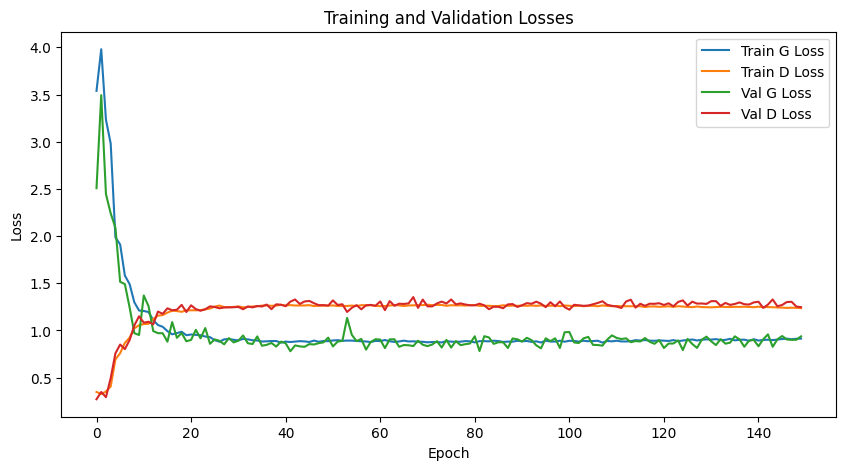

In [2]:
# Check if CUDA is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = MNISTDataset()
train_dataset, val_dataset, test_dataset = dataset.split()

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

generator = Generator().to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCELoss()
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)

train_g_losses = []  # to store the generator training loss at each epoch
train_d_losses = []  # to store the discriminator training loss at each epoch
val_g_losses = []  # to store the generator validation loss at each epoch
val_d_losses = []  # to store the discriminator validation loss at each epoch

for epoch in range(150):
    train_g_loss = 0
    train_d_loss = 0
    for batch in train_dataloader:
        # Move the batch to the device
        batch = batch.to(device)

        # Train the discriminator
        d_optimizer.zero_grad()
        real_outputs = discriminator(batch)
        d_loss_real = criterion(real_outputs, torch.ones(batch.size(0), 1).to(device))  # Move the target tensor to the device
        z = torch.randn(batch.size(0), 100).to(device)  # Move the noise tensor to the device
        fake_images = generator(z)
        fake_outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(fake_outputs, torch.zeros(batch.size(0), 1).to(device))  # Move the target tensor to the device
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        d_optimizer.step()
        train_d_loss += d_loss.item()

        # Train the generator
        g_optimizer.zero_grad()
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, torch.ones(batch.size(0), 1).to(device))  # Move the target tensor to the device
        g_loss.backward()
        g_optimizer.step()
        train_g_loss += g_loss.item()

    train_g_loss /= len(train_dataloader)
    train_g_losses.append(train_g_loss)
    train_d_loss /= len(train_dataloader)
    train_d_losses.append(train_d_loss)

    val_g_loss = 0
    val_d_loss = 0
    for batch in val_dataloader:
        # Move the batch to the device
        batch = batch.to(device)

        # Compute the discriminator validation loss
        real_outputs = discriminator(batch)
        d_loss_real = criterion(real_outputs, torch.ones(batch.size(0), 1).to(device))
        z = torch.randn(batch.size(0), 100).to(device)
        fake_images = generator(z)
        fake_outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(fake_outputs, torch.zeros(batch.size(0), 1).to(device))
        d_loss = d_loss_real + d_loss_fake
        val_d_loss += d_loss.item()

        # Compute the generator validation loss
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, torch.ones(batch.size(0), 1).to(device))
        val_g_loss += g_loss.item()

    val_g_loss /= len(val_dataloader)
    val_g_losses.append(val_g_loss)
    val_d_loss /= len(val_dataloader)
    val_d_losses.append(val_d_loss)

    print(f'Epoch: {epoch+1}, Train G Loss: {train_g_loss}, Train D Loss: {train_d_loss}, Val G Loss: {val_g_loss}, Val D Loss: {val_d_loss}')

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_g_losses, label='Train G Loss')
plt.plot(train_d_losses, label='Train D Loss')
plt.plot(val_g_losses, label='Val G Loss')
plt.plot(val_d_losses, label='Val D Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

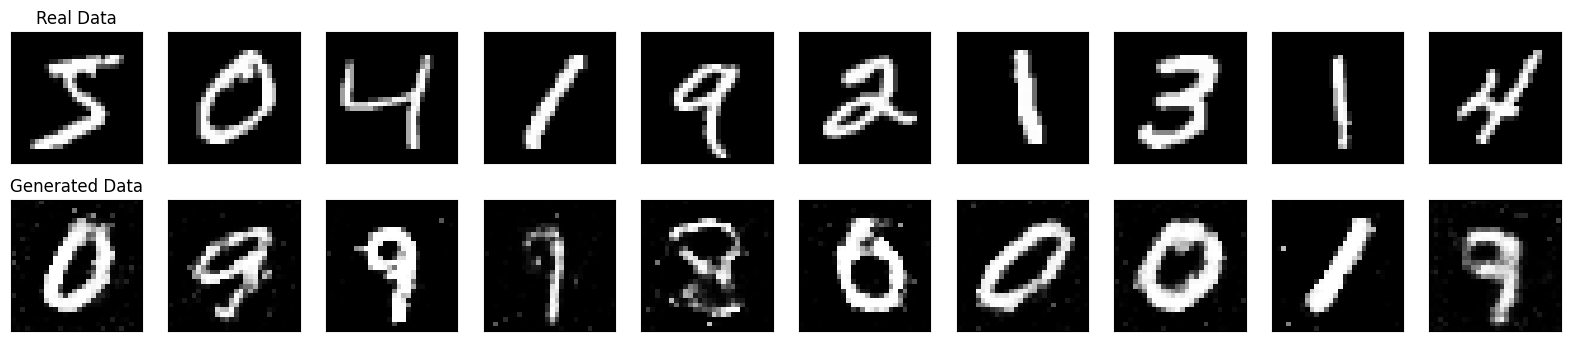

In [4]:
# Visualize the original images and generated images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    original_img = dataset[i].numpy().reshape(28, 28)
    plt.imshow(original_img, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Real Data")  # Add title to the first subplot

    # display generated
    z = torch.randn(1, 100).to(device)  # Move the noise tensor to the device
    generated_img = generator(z).detach().cpu().numpy().reshape(28, 28)  # Move the tensor back to CPU for plotting
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_img, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Generated Data")  # Add title to the first subplot

plt.show()